#### Let's see if we can find out why that model was performing so well

In [1]:
#import packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
np.random.seed(42)
%matplotlib inline

In [2]:
corpus = pd.read_csv('../Data/first_model_data.csv')
corpus

Unnamed: 0  SUBJECT_ID  HADM_ID ADMISSION_TYPE  \
0               0          46   144073      EMERGENCY   
1               1          46   144073      EMERGENCY   
2               2         112   174105      EMERGENCY   
3               3         112   174105      EMERGENCY   
4               4         158   169433      EMERGENCY   
...           ...         ...      ...            ...   
11682       11682       98948   125469      EMERGENCY   
11683       11683       99183   184631      EMERGENCY   
11684       11684       99184   171203      EMERGENCY   
11685       11685       99366   136021      EMERGENCY   
11686       11686       99562   129689         URGENT   

              ADMISSION_LOCATION   CHARTDATE            CHARTTIME  \
0      CLINIC REFERRAL/PREMATURE  2133-02-21  2133-02-21 05:07:00   
1      CLINIC REFERRAL/PREMATURE  2133-02-24                  NaN   
2           EMERGENCY ROOM ADMIT  2194-06-14  2194-06-14 04:55:00   
3           EMERGENCY ROOM ADMIT  2194-06-18                  NaN   
4      TRANSFER FROM HOSP/EXTRAM  2170-02-03  2170-02-03 13:29:00   
...                          ...         ...                  ...   
11682  CLINIC REFERRAL/PREMATURE  2136-10-29                  NaN   
11683  CLINIC REFERRAL/PREMATURE  2157-03-04                  NaN   
11684       EMERGENCY ROOM ADMIT  2193-12-19                  NaN   
11685  CLINIC REFERRAL/PREMATURE  2197-05-18                  NaN   
11686  TRANSFER FROM HOSP/EXTRAM  2183-02-18                  NaN   

                CATEGORY DESCRIPTION  ISERROR  \
0          Nursing/other      Report      NaN   
1      Discharge summary      Report      NaN   
2          Nursing/other      Report      NaN   
3      Discharge summary      Report      NaN   
4          Nursing/other      Report      NaN   
...                  ...         ...      ...   
11682  Discharge summary      Report      NaN   
11683  Discharge summary      Report      NaN   
11684  Discharge summary      Report      NaN   
11685  Discharge summary      Report      NaN   
11686  Discharge summary      Report      NaN   

                                                    TEXT  \
0      MICU NPN 7P-7A\nPt. came from IR around 2200 p...   
1      Admission Date:  [**2133-2-20**]       Dischar...   
2      NURSING MICU NOTE 7P-7A\n\nPT [**Name (NI) 577...   
3      Admission Date: [**2194-6-13**]        Dischar...   
4      NURSING ADMISSION NOTE 1200-1500\nPT IS A 67 Y...   
...                                                  ...   
11682  Admission Date:  [**2136-10-21**]             ...   
11683  Admission Date:  [**2157-3-1**]              D...   
11684  Admission Date:  [**2193-12-16**]             ...   
11685  Admission Date:  [**2197-3-20**]              ...   
11686  Admission Date:  [**2183-2-2**]              D...   

                     DIAGNOSIS  
0       GASTROINTESTINAL BLEED  
1       GASTROINTESTINAL BLEED  
2       GASTROINTESTINAL BLEED  
3       GASTROINTESTINAL BLEED  
4       GASTROINTESTINAL BLEED  
...                        ...  
11682  INTRACRANIAL HEMORRHAGE  
11683   GASTROINTESTINAL BLEED  
11684  INTRACRANIAL HEMORRHAGE  
11685  INTRACRANIAL HEMORRHAGE  
11686   GASTROINTESTINAL BLEED  

[11687 rows x 12 columns]

In [3]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [4]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
  

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def doc_preparer(doc, stop_words=sw):
    '''  
    :param doc: a document from the corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [5]:
X = corpus.TEXT.astype('str')
y = corpus.DIAGNOSIS.astype('str')

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.25)

token_docs = [doc_preparer(doc, sw) for doc in X_train]
token_docs[0]

'neuro pt remain pleasant good historian pr c arithitic pain receive tylenol mg desire effect reach within min pt remain afebrile time neuro deficit note cv pt begin hr shift drop sbp hr occ pac pt fill ileostomy time loose maroon stool pt give bolus cc n quickly respond return baseline regard v pt drop hct pt receive two unit prbc take red tag study intervention take place hct rechecked follow scan result two hr later pt drop sbp pt c burn sensation upper abd denies c p sob h r occ pac pt respond cc n bolus return baseline v hct send reconfirm result hct pt since receive three additional unit micu intern resident pt bedside observe pt output total cc frothy maroon brown liquid maroon red ace inhibitor presently hold g team notify resp pt remain clear lung sound field c sob resp rate remain regular continue monitor closely pt receive multiple bolus blood transfusion gu gi pt remain npo time abd remain soft non tender bowel sound easily audible ileostomy bag change without difficulty pt

In [6]:
import re

def preprocess(text):
    clean_data = []
    for x in (text): #this is Df_pd for Df_np (text[:])
        new_text = re.sub('<.*?>', '', x)   # remove HTML tags
        new_text = re.sub(r'[^\w\s]', '', new_text) # remove punc.
        new_text = re.sub(r'\d+','',new_text)# remove numbers
        new_text = new_text.lower() # lower case, .upper() for upper          
        if new_text != '':
            clean_data.append(new_text)
    return clean_data

In [7]:
preprocess(corpus.TEXT)

['micu npn pa\npt came from ir around  post angiogram right groin pressure dsg intact no hematoma or bleeding noted from site  angiogram was neg for any active bleed pt received  units of prbcs in special procedures for crit of  which was  bogus results post transfusion crit was  no further rbcs was given awaiting this ams crit\n\nneuro alert and orientated x very appropriate\n\nresp in o via nc at  liters sats \n\ncv bp and hr stable no ectopy noted k  repleated with  meq kcl po pt was given meq then one hour later meq\n\ngi started on protonix iv no active gi bleeding noted abd soft bs present ptis npo\n\ngu  f foley was placed without any problems draining clear yellow urine\n\npts dentures were left at hospital  hospital they anticipated his return there last noc pt has his glasses with him only\n\n',
 'admission date         discharge date  \n\ndate of birth          sex  m\n\nservice  company medicine\n\nchief complaint  status post ercp bleed and transfer out of\nsicu\n\nhistory

In [8]:
def tokenization_w(words):
    w_new = []
    for w in (words[:][:]):  # for NumPy = words[:]
        w_token = word_tokenize(w)
        if w_token != '':
            w_new.append(w_token)
    return w_new

In [9]:
tokenization_w(corpus.TEXT)

[['MICU',
  'NPN',
  '7P-7A',
  'Pt',
  '.',
  'came',
  'from',
  'IR',
  'around',
  '2200',
  'post',
  'angiogram',
  ',',
  'right',
  'groin',
  'pressure',
  'dsg',
  '.',
  'intact',
  ',',
  'no',
  'hematoma',
  'or',
  'bleeding',
  'noted',
  'from',
  'site',
  '.',
  'Angiogram',
  'was',
  'neg',
  '.',
  'for',
  'any',
  'active',
  'bleed',
  '.',
  'Pt',
  'received',
  '2',
  'units',
  'of',
  'prbc',
  "'s",
  'in',
  'special',
  'procedures',
  'for',
  'crit',
  'of',
  '14',
  'which',
  'was',
  '?',
  'bogus',
  'results',
  '.',
  'post',
  'transfusion',
  'crit',
  'was',
  '27.8',
  'no',
  'further',
  'rbc',
  "'s",
  'was',
  'given',
  'awaiting',
  'this',
  'am',
  "'s",
  'crit',
  '.',
  'Neuro',
  ':',
  'Alert',
  'and',
  'orientated',
  'x3',
  ',',
  'very',
  'appropriate',
  '.',
  'Resp',
  ':',
  'In',
  'o2',
  'via',
  'n/c',
  'at',
  '2',
  'liters',
  ',',
  'sats',
  '98-100',
  '%',
  '.',
  'CV',
  ':',
  'BP',
  'and',
  'hr',
 

In [10]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
corpus["TEXT"] = corpus["TEXT"].apply(lambda x: clean_text(x))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(corpus['TEXT'], 20)
for word, freq in common_words:
    print(word, freq)
    
df = pd.DataFrame(common_words, columns = ['TEXT' , 'count'])

pt 36284
name 18657
patient 16759
blood 15090
mg 13160
last 12120
tablet 11823
note 11470
po 11265
the 10179
discharge 10039
follow 9320
right 9155
clear 8351
time 8272
continue 8043
one 8027
remain 7991
gi 7776
neuro 7704


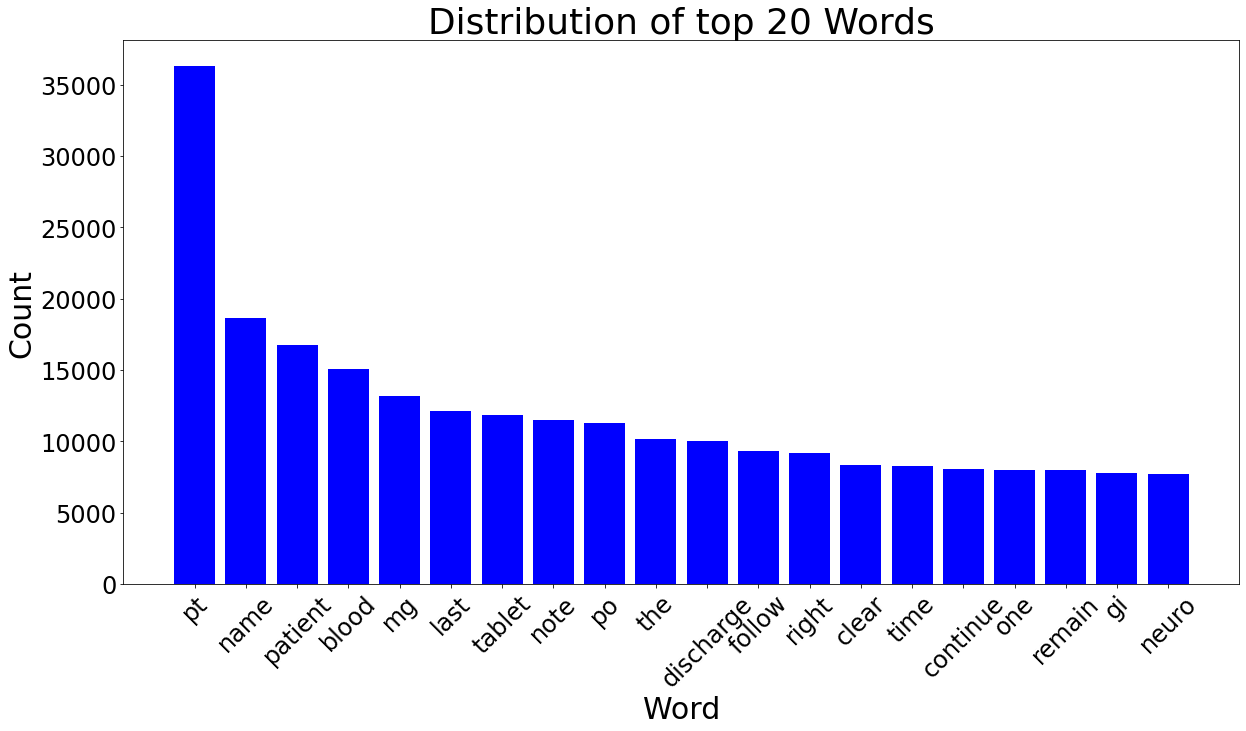

In [12]:
x = df['TEXT']
y = df['count']

plt.figure(figsize=(20,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Word', fontsize = 30)
plt.xticks(rotation=45, fontsize=24)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=24)
plt.title('Distribution of top 20 Words', fontsize=36);
plt.savefig('word_dist.png') 

#### most common words by count vectorizer are not really helpful here, let's see if the tfidf vectorizer gives any more indication on what is happening

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(corpus['TEXT'], 20)
for word, freq in common_words:
    print(word, freq)
    
df = pd.DataFrame(common_words, columns = ['TEXT' , 'count'])

pt 975.9627796344608
name 410.31905357509714
note 355.4601490043789
patient 343.81199237563357
care 338.78829536790795
remain 336.31624817671974
resp 325.6067584399438
vent 305.3179490331208
continue 295.2969126296187
last 286.5595706696014
clear 270.12140258614005
plan 267.40742142169967
hct 256.47847226945004
change 252.1535963690415
neuro 252.0516843797153
blood 250.9290676614189
cont 249.37182752200874
follow 241.30518985916132
give 240.40193251216718
hr 230.60683574462863


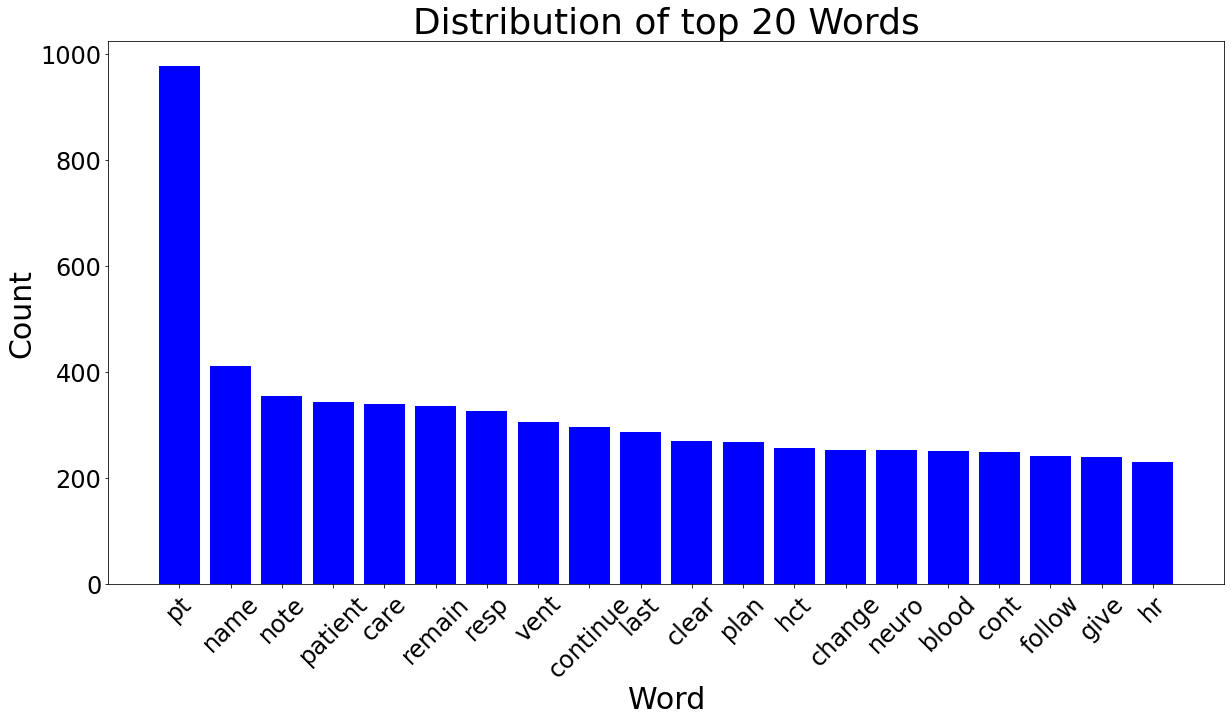

In [14]:
x = df['TEXT']
y = df['count']

plt.figure(figsize=(20,10))
plt.bar(x,y,color = 'blue')
plt.xlabel('Word', fontsize = 30)
plt.xticks(rotation=45, fontsize=24)
plt.ylabel('Count', fontsize = 30)
plt.yticks(fontsize=24)
plt.title('Distribution of top 20 Words', fontsize=36);
plt.savefig('word_dist_tfidf.png') 

In [21]:
# add appropriate words that will be ignored in the analysis
stop = stopwords.words('english')

more = ('pt','name','note','patient','care','remain','continue','last','clear','plan','change','follow','give','hr')
stop.extend(more)

In [24]:
def extend_clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    more = ('pt','name','note','patient','care','remain','continue','last','clear','plan','change','follow','give','hr')
    stop.extend(more)
    stop = stop
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
corpus["TEXT"] = corpus["TEXT"].apply(lambda x: extend_clean_text(x))

In [25]:
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(corpus['TEXT'], 20)
for word, freq in common_words:
    print(word, freq)
    
df = pd.DataFrame(common_words, columns = ['TEXT' , 'count'])

pt 339.37253057549714
resp 333.41953491215605
vent 320.5940455133419
hct 262.90581324004194
neuro 257.7435587028315
blood 256.8365739593111
cont 254.532652308647
care 242.18404075639657
family 231.19099987695557
thick 231.01271653504705
respiratory 228.4757394596339
time 227.24992902802157
today 226.5460739569374
see 225.4882462617445
mg 225.35939601947126
secretion 220.81091297825432
gi 220.66531338158552
po 219.9610401638817
stable 214.18297112147323
place 210.62156137210408


that looks a little better, could probably remove a few more.  